In [62]:
import pandas as pd
import numpy as np
from random import seed,randint, sample, choices
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
sns.set(color_codes=True)

<h3>Creating non-normal Population <\h3>

In [2]:
population = []

In [3]:
# seed random number generator
seed(0)
# generate some integers
for _ in range(400):
	population.append(randint(0, 100))
for _ in range(400):
	population.append(randint(0, 50))
    

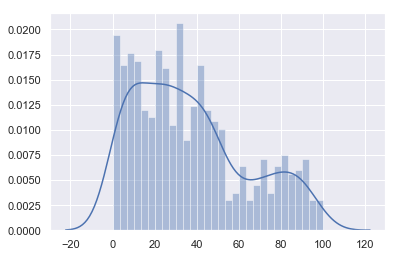

In [8]:
sns.distplot(population,bins = 30)

In [85]:
actual_mean = np.mean(population)
actual_standard_deviation = np.std(population)
print('mean of population = ',actual_mean,'\nStandard deviation = ',actual_standard_deviation)

mean of population =  36.75 
Standard deviation =  26.719796032155635


<h3> Sampling distribution of Sample Mean and CLT<\h3>

In [52]:
# Sampling distribution with sample size = 100
sample_size = 200
means_of_sample_mean = []
for i in range(500):
    s = []
    s = choices(population,k=sample_size)
    means_of_sample_mean.append(np.mean(s))

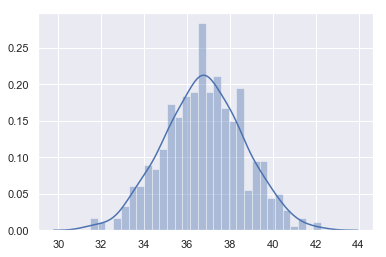

In [53]:
sns.distplot(means_of_sample_mean,bins= 30)

<h4 style="color:red;" > Try to Increase or decrease the size of above sample and check CLT plays its role <\h4>
<h4> increasing the size should decrease the Standard deviation and mean will be close to actual population mean<\h4>

In [54]:
print('mean of population = ',actual_mean,'\nmean of above sampling distribution = ',np.mean(means_of_sample_mean),'\nand Standard deviation of sampling distribution = ',np.std(means_of_sample_mean))

mean of population =  36.75 
mean of above sampling distribution =  36.781699999999994 
and Standard deviation of sampling distribution =  1.8590306909785002


<h2>Estimating standard deviation of sampling distribution using Standard error formula<\h2> 

In [86]:
#  Standard error = σ/√n
Standard_error = actual_standard_deviation/np.sqrt(sample_size)
print('Standard deviation of sampling distribution = ',np.std(means_of_sample_mean),'\nUsing Standard error =',Standard_error)

Standard deviation of sampling distribution =  1.8590306909785002 
Using Standard error = 1.8893748966258654


<h4>Compare the standard deviation of sampling distribution with Standard error, it will be almost equal and that's the power or standard error<\h4> 

<h2>Estimating Confidence Interval for population mean from below random sample<\h2> 

In [63]:
#drawing a single random sample from our population with given sample size
sam = choices(population,k=sample_size)

In [79]:
estimate_mean_sample = np.mean(sam)
estimate_std_sample = np.std(sam)
print('sample mean = ',estimate_mean_sample,'\nsample Standard deviation = ',estimate_std_sample)

sample mean =  39.605 
sample Standard deviation =  25.957252840006007


<h2> Confidence interval given population standard deviation <\h2>
<h3>confidence interval = sample mean +- Z(1 - α/2) * (standard deviation of population(σ)/ √n)<\h3>

In [80]:
# Z(1-α/2) = Z(1-5/2) = Z(0.975)
z = st.norm.ppf(0.975)
print(z)

1.959963984540054


In [81]:
margin = z * Standard_error
print(margin)

3.7031067506807838


In [87]:
interval = [estimate_mean_sample -margin, estimate_mean_sample + margin ]
print(interval,'\n',actual_mean)

[35.901893249319215, 43.30810675068078] 
 36.75


<h2> Confidence interval unknown population standard deviation <\h2>
<h3>confidence interval = sample mean +- Z(1 - α/2) * (estimated sample standard deviation/ √n)<\h3>

In [91]:
# Z will remain same for 95% confidence 
# Only sigma is replaced with sample standard deviation
Standard_error_2 = estimate_std/np.sqrt(sample_size)
print(Standard_error_2)

1.8354549504142015


In [94]:
margin_2 = z * Estimate_Standard_error
print(margin_2)

3.5974255980575855


In [93]:
interval_2 = [estimate_mean_sample -margin_2, estimate_mean_sample + margin_2 ]
print(interval_2,'\n',actual_mean)

[36.00757440194241, 43.20242559805758] 
 36.75


<h2> In both the case interval captures true population mean <\h2>